In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [395]:
df_test = pd.read_excel('test_data.xlsx')
df_test.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,155,Mild only,Both,48.900000,0.3410,0.325,0.1510,0.1190,0.0630,NaN,...,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Severe/Critical Only,Both,NaN,0.7500,0.680,0.2500,0.1700,0.1100,0.1100,...,NaN,37.0,36.0,NaN,1.0,NaN,0.06,NaN,10.0,16.0
2,156,Severe/Critical Only,Ventilation only,NaN,0.7900,0.740,0.2600,0.2400,0.1800,0.1500,...,NaN,48.0,39.0,NaN,1.0,NaN,0.05,NaN,12.0,17.0
3,156,Severe/Critical Only,Non-ventilation only,NaN,0.6800,0.580,0.2100,0.0500,0.0000,0.0500,...,NaN,27.0,35.0,NaN,1.0,NaN,0.06,NaN,0.0,13.0
4,157,All,Both,52.943333,0.4654,NaN,0.2121,0.0938,0.0733,0.0327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
df_train = pd.read_excel('training_data.xlsx')
df_train.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [397]:
print(df_test.shape)
print(df_train.shape)

(53, 54)
(475, 91)


In [398]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 91 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [399]:
df_train=df_train.iloc[:,:55]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

<AxesSubplot:>

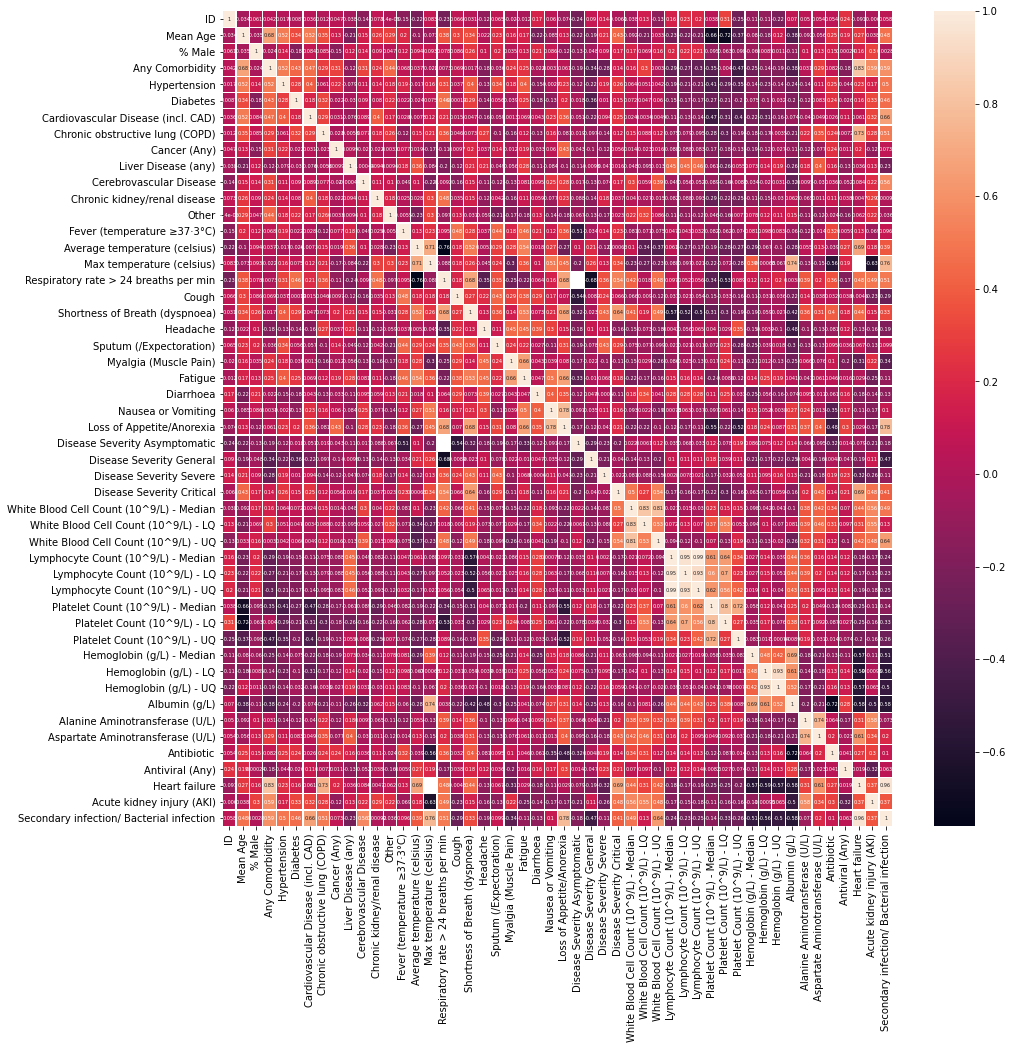

In [400]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),linewidths=0.2,annot_kws={"size":5},annot=True)

In [401]:
df_train.drop(['ID'],axis=1,inplace=True)
df_train.head()

,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1
2,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0
3,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,0.0300,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,0.0510,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [402]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        print(i,'------------------')
        print(df_train[i].unique(),'\n')

Severity ------------------
['All' 'Severe/Critical Only' 'Mild only' nan 'Both' 'Mild' 'Severe'
 'Asymptomatic only' 'Severe/critical only'] 

Ventilation ------------------
['Both' nan 'Ventilation only' 'Non-ventilation only' 'ΝΑ' 'Yes' 'No'] 

ICU length of stay, days ------------------
[8 7 10 6 11 nan 5 0.67 0 2 31 3 4 9 'na'] 

Hospital length of stay, days ------------------
[11 7.5 12 15 14 16 23.2 nan 17 13 18.5 4 14.5 10 8.4 8.6 18 19.5 13.8
 16.4 17.22 17.41 19.43 15.7 15.14 12.67 5 17.81 8 20 16.68 16.5 10.5 12.2
 11.6 19 18.3 26.5 21.25 11.2 2 7 12.71 10.56 9 12.5 10.45 11.16 9.27 6.5
 12.7 53 51 55 20.8 21 23 4.6 30 13.5 27.5 39 16.63 17.27 14.94 28 15.08
 22 26 23.7 24.9 21.9 25.3 31 20.1 'na' 12.9 11.4 15.4 22.5 5.36 0 7.31] 

Mortality ------------------
[0.28 1 0 0.16 0.15 0.17 0.04 0.07 0.06 0.25 0.64 0.55 0.79 0.01 0.08 0.22
 0.38 0.11 0.1 0.03 0.35 0.67 0.52 0.34 0.45 0.2 0.05 0.36 0.23 0.3 0.09
 0.49 0.02 0.14 0.12 0.21 0.62 0.48 0.47 0.54 0.4 0.63 0.6 0.51 0.5 0

### Cleaning ICU leangth of stays columns

In [403]:
df_train['ICU length of stay, days'] = df_train['ICU length of stay, days'].replace('na',np.NaN,regex=True) 

In [404]:
df_train['ICU length of stay, days'] = df_train['ICU length of stay, days'].apply(pd.to_numeric)
df_train['ICU length of stay, days'].unique()

array([ 8.  ,  7.  , 10.  ,  6.  , 11.  ,   nan,  5.  ,  0.67,  0.  ,
        2.  , 31.  ,  3.  ,  4.  ,  9.  ])

### Replacing nan with mean of values

In [405]:
df_train['ICU length of stay, days']=df_train['ICU length of stay, days'].fillna(df_train['ICU length of stay, days'].mean())

### Hospital length of stays cleaning

In [406]:
df_train['Hospital length of stay, days'] = df_train['Hospital length of stay, days'].replace('na',np.NaN,regex=True) 
df_train['Hospital length of stay, days'] = df_train['Hospital length of stay, days'].apply(pd.to_numeric)
df_train['Hospital length of stay, days'].unique()

array([11.  ,  7.5 , 12.  , 15.  , 14.  , 16.  , 23.2 ,   nan, 17.  ,
       13.  , 18.5 ,  4.  , 14.5 , 10.  ,  8.4 ,  8.6 , 18.  , 19.5 ,
       13.8 , 16.4 , 17.22, 17.41, 19.43, 15.7 , 15.14, 12.67,  5.  ,
       17.81,  8.  , 20.  , 16.68, 16.5 , 10.5 , 12.2 , 11.6 , 19.  ,
       18.3 , 26.5 , 21.25, 11.2 ,  2.  ,  7.  , 12.71, 10.56,  9.  ,
       12.5 , 10.45, 11.16,  9.27,  6.5 , 12.7 , 53.  , 51.  , 55.  ,
       20.8 , 21.  , 23.  ,  4.6 , 30.  , 13.5 , 27.5 , 39.  , 16.63,
       17.27, 14.94, 28.  , 15.08, 22.  , 26.  , 23.7 , 24.9 , 21.9 ,
       25.3 , 31.  , 20.1 , 12.9 , 11.4 , 15.4 , 22.5 ,  5.36,  0.  ,
        7.31])

<AxesSubplot:xlabel='Hospital length of stay, days', ylabel='Count'>

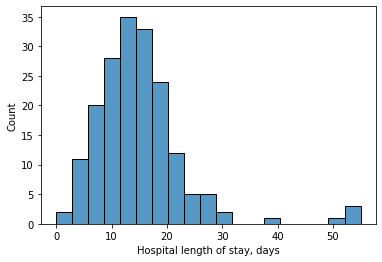

In [407]:
sns.histplot(data=df_train,x='Hospital length of stay, days')

#### From this histplot we can see that data is normally distributed so we will replace nan with mean

In [408]:
df_train['Hospital length of stay, days']=df_train['Hospital length of stay, days'].fillna(df_train['Hospital length of stay, days'].mean())

### Cleaning Mortality column 

In [409]:
df_train['Mortality'] = df_train['Mortality'].replace('na',np.NaN,regex=True)
df_train['Mortality'] = df_train['Mortality'].replace('0%%',np.NaN,regex=True) 
df_train['Mortality'] = df_train['Mortality'].apply(pd.to_numeric)
df_train['Mortality'].unique()

array([0.28, 1.  , 0.  , 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64,
       0.55, 0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1 , 0.03, 0.35, 0.67,
       0.52, 0.34, 0.45, 0.2 , 0.05, 0.36, 0.23, 0.3 , 0.09, 0.49, 0.02,
       0.14, 0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4 , 0.63, 0.6 , 0.51,
       0.5 , 0.27, 0.56, 0.18, 0.29, 0.76, 0.19,  nan, 0.26, 0.41, 0.7 ,
       0.66, 0.42, 0.9 , 0.32, 0.39, 0.58])

<AxesSubplot:xlabel='Mortality', ylabel='Count'>

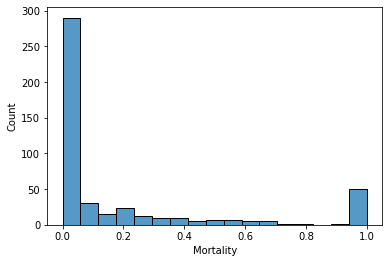

In [410]:
sns.histplot(data=df_train,x='Mortality')

In [411]:
df_train['Mortality']=df_train['Mortality'].fillna(df_train['Mortality'].median())

#### -------------------------------------------------------------------------------------------------------------------------------

In [412]:
df_train.isna().sum()

Severity                                     17
Ventilation                                 174
Mean Age                                    223
% Male                                       45
Any Comorbidity                             253
Hypertension                                166
Diabetes                                    150
Cardiovascular Disease (incl. CAD)          180
Chronic obstructive lung (COPD)             213
Cancer (Any)                                242
Liver Disease (any)                         283
Cerebrovascular Disease                     302
Chronic kidney/renal disease                225
Other                                       276
Fever (temperature ≥37·3°C)                 119
Average temperature (celsius)               411
Max temperature (celsius)                   421
Respiratory rate > 24 breaths per min       437
Cough                                       135
Shortness of Breath (dyspnoea)              232
Headache                                

In [413]:
df_train.drop(['Ventilation'],axis=1,inplace=True)
df_train.isna().sum()

Severity                                     17
Mean Age                                    223
% Male                                       45
Any Comorbidity                             253
Hypertension                                166
Diabetes                                    150
Cardiovascular Disease (incl. CAD)          180
Chronic obstructive lung (COPD)             213
Cancer (Any)                                242
Liver Disease (any)                         283
Cerebrovascular Disease                     302
Chronic kidney/renal disease                225
Other                                       276
Fever (temperature ≥37·3°C)                 119
Average temperature (celsius)               411
Max temperature (celsius)                   421
Respiratory rate > 24 breaths per min       437
Cough                                       135
Shortness of Breath (dyspnoea)              232
Headache                                    300
Sputum (/Expectoration)                 

In [414]:
df_train.isna().sum()

Severity                                     17
Mean Age                                    223
% Male                                       45
Any Comorbidity                             253
Hypertension                                166
Diabetes                                    150
Cardiovascular Disease (incl. CAD)          180
Chronic obstructive lung (COPD)             213
Cancer (Any)                                242
Liver Disease (any)                         283
Cerebrovascular Disease                     302
Chronic kidney/renal disease                225
Other                                       276
Fever (temperature ≥37·3°C)                 119
Average temperature (celsius)               411
Max temperature (celsius)                   421
Respiratory rate > 24 breaths per min       437
Cough                                       135
Shortness of Breath (dyspnoea)              232
Headache                                    300
Sputum (/Expectoration)                 

<AxesSubplot:xlabel='Mean Age', ylabel='Count'>

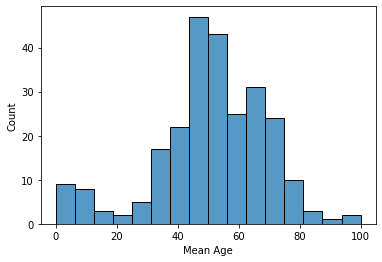

In [415]:
sns.histplot(data=df_train,x='Mean Age')

### Replacing mean age missing values with mean

In [416]:
df_train['Mean Age'] = df_train['Mean Age'].fillna(df_train['Mean Age'].mean())

<AxesSubplot:xlabel='Mean Age', ylabel='Count'>

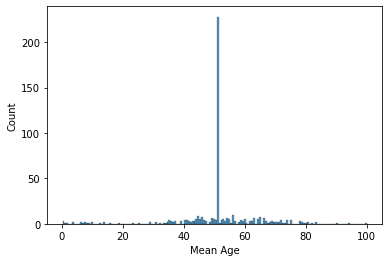

In [417]:
sns.histplot(df_train['Mean Age'])

### Cleaning %Male column

<AxesSubplot:xlabel='% Male', ylabel='Count'>

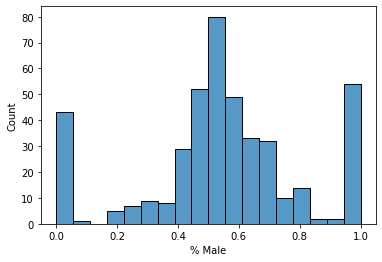

In [418]:
sns.histplot(df_train['% Male'])

### Here the mean and median of this data are equal so we can say it is symmetrically distributed and hence replacing null values with mean

<AxesSubplot:xlabel='% Male', ylabel='Count'>

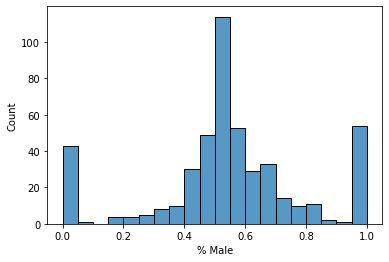

In [419]:
df_train['% Male'] = df_train['% Male'].fillna(df_train['% Male'].mean())
sns.histplot(df_train['% Male'])

### Cleaning Comorbidity column

<AxesSubplot:xlabel='Any Comorbidity', ylabel='Count'>

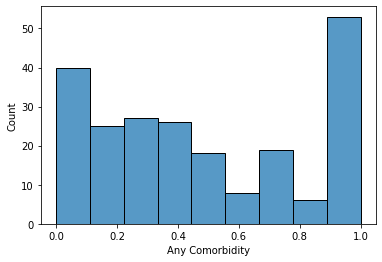

In [420]:
sns.histplot(df_train['Any Comorbidity'])

In [421]:
df_train.drop(['Any Comorbidity'],axis=1,inplace=True)

### Hypertension

<AxesSubplot:xlabel='Hypertension', ylabel='Count'>

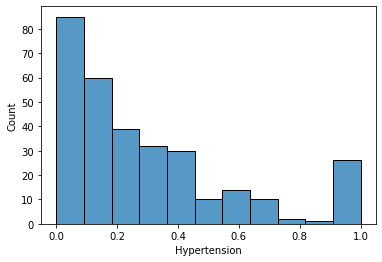

In [422]:
sns.histplot(df_train['Hypertension'])

In [423]:
df_train['Hypertension'].unique()

array([0.3   , 0.4815, 0.2336,    nan, 0.15  , 0.13  , 0.05  , 0.23  ,
       0.208 , 0.14  , 0.4   , 0.389 , 0.364 , 0.429 , 0.738 , 0.1648,
       0.081 , 0.121 , 0.034 , 0.1633, 0.188 , 0.117 , 0.1548, 0.113 ,
       0.143 , 0.34  , 0.134 , 0.237 , 0.358 , 0.137 , 0.312 , 0.583 ,
       0.216 , 0.1   , 0.096 , 0.094 , 0.06  , 0.    , 0.083 , 0.667 ,
       0.706 , 0.645 , 0.28  , 0.08  , 0.67  , 0.194 , 0.274 , 0.353 ,
       0.273 , 0.217 , 0.056 , 0.168 , 0.289 , 0.2311, 0.1915, 0.2928,
       0.112 , 0.109 , 0.129 , 0.122 , 0.4444, 0.561 , 0.182 , 0.222 ,
       0.139 , 0.6   , 0.175 , 0.3333, 1.    , 0.5842, 0.54  , 0.62  ,
       0.244 , 0.379 , 0.5833, 0.1667, 0.1428, 0.339 , 0.286 , 0.396 ,
       0.105 , 0.64  , 0.078 , 0.068 , 0.2091, 0.3947, 0.1111, 0.03  ,
       0.1442, 0.125 , 0.1607, 0.1536, 0.1622, 0.1525, 0.2   , 0.185 ,
       0.17  , 0.111 , 0.267 , 0.31  , 0.163 , 0.2796, 0.3103, 0.25  ,
       0.443 , 0.673 , 0.239 , 0.214 , 0.259 , 0.3523, 0.2329, 0.6203,
      

In [424]:
df_train['Hypertension'] = df_train['Hypertension'].fillna(df_train['Hypertension'].mean())

### Diabetes

<AxesSubplot:xlabel='Diabetes', ylabel='Count'>

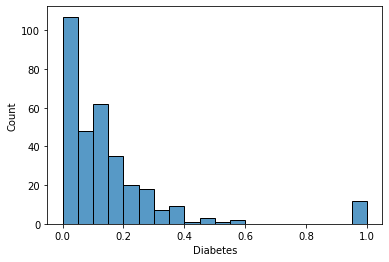

In [425]:
sns.histplot(df_train['Diabetes'])

In [426]:
df_train['Diabetes'] = df_train['Diabetes'].fillna(0)

In [427]:
from sklearn.preprocessing import MinMaxScaler
df_train['Diabetes'] = MinMaxScaler().fit_transform(np.array(df_train['Diabetes']).reshape(-1,1))

<AxesSubplot:xlabel='Diabetes', ylabel='Count'>

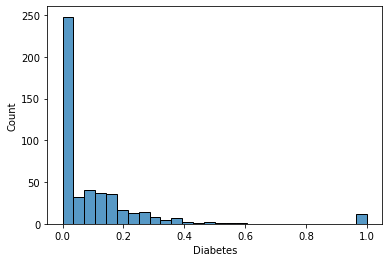

In [428]:
sns.histplot(df_train['Diabetes'])

In [429]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Severity                                  458 non-null    object 
 1   Mean Age                                  475 non-null    float64
 2   % Male                                    475 non-null    float64
 3   Hypertension                              475 non-null    float64
 4   Diabetes                                  475 non-null    float64
 5   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 6   Chronic obstructive lung (COPD)           262 non-null    float64
 7   Cancer (Any)                              233 non-null    float64
 8   Liver Disease (any)                       192 non-null    float64
 9   Cerebrovascular Disease                   173 non-null    float64
 10  Chronic kidney/renal disease          

In [430]:
to_drop2 = ['Cerebrovascular Disease','Chronic kidney/renal disease','Other','Average temperature (celsius)','Max temperature (celsius)','Respiratory rate > 24 breaths per min','Loss of Appetite/Anorexia','Antiviral (Any)','Heart failure','Secondary infection/ Bacterial infection','Acute kidney injury (AKI)']
df_train.drop(to_drop2,axis=1,inplace=True)

In [431]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Severity                                  458 non-null    object 
 1   Mean Age                                  475 non-null    float64
 2   % Male                                    475 non-null    float64
 3   Hypertension                              475 non-null    float64
 4   Diabetes                                  475 non-null    float64
 5   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 6   Chronic obstructive lung (COPD)           262 non-null    float64
 7   Cancer (Any)                              233 non-null    float64
 8   Liver Disease (any)                       192 non-null    float64
 9   Fever (temperature ≥37·3°C)               356 non-null    float64
 10  Cough                                 

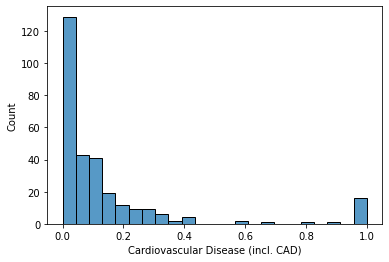

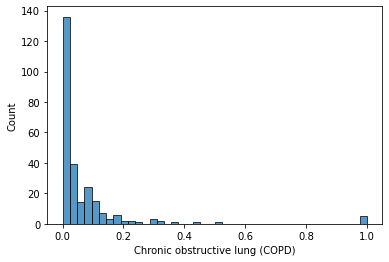

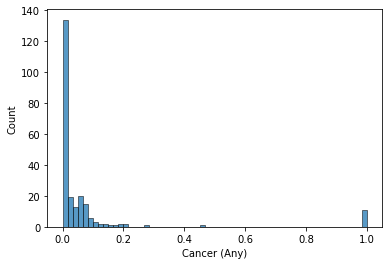

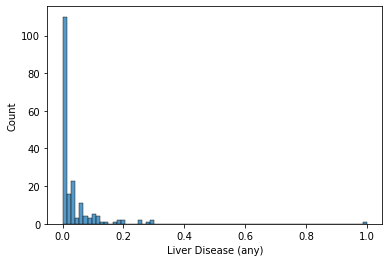

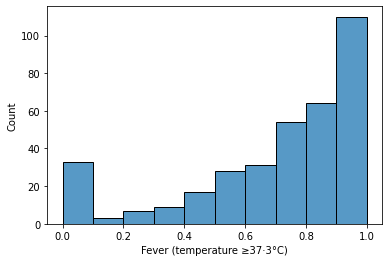

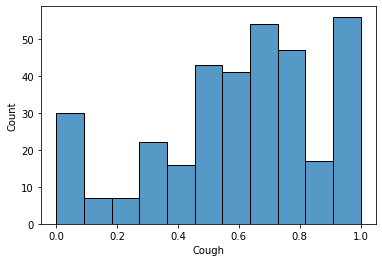

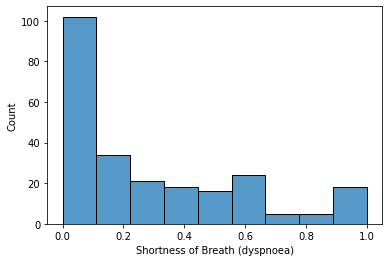

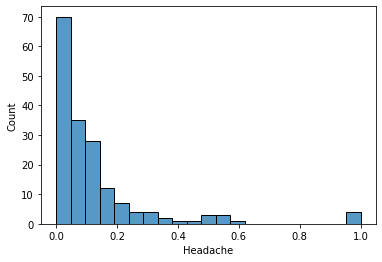

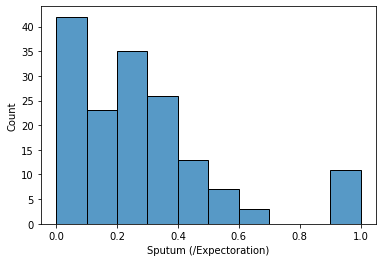

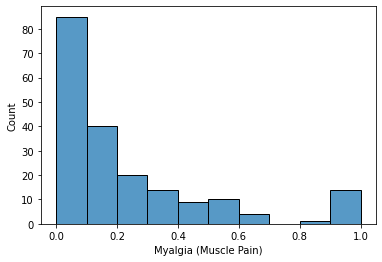

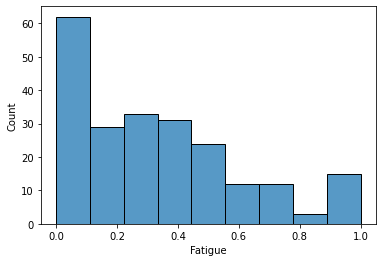

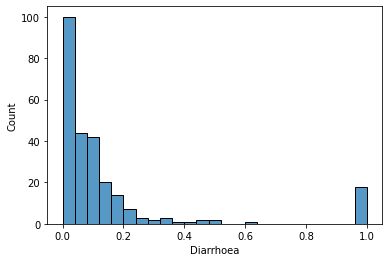

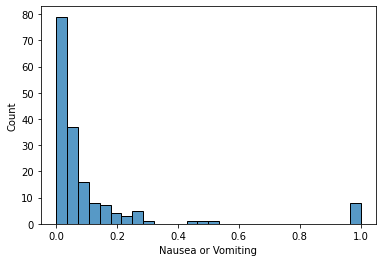

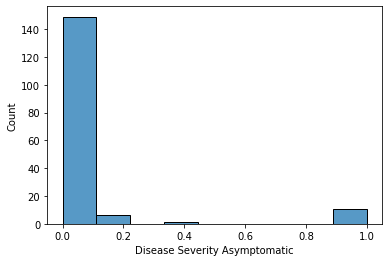

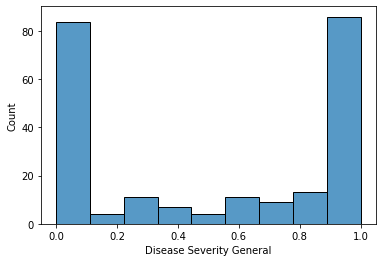

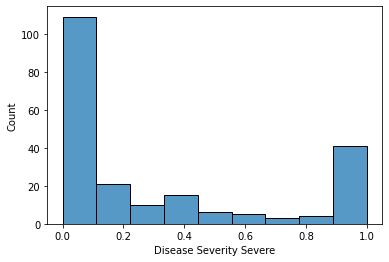

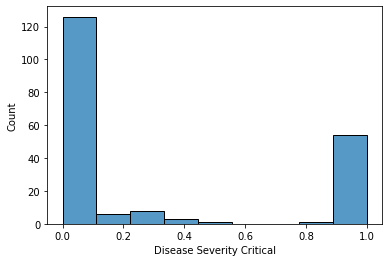

In [432]:
for i in df_train.columns[5:22]:
    sns.histplot(df_train[i])
    plt.show()

In [433]:
for i in df_train.columns[1:]:
    print(i,'--------')
    print('Mean->',df_train[i].mean(),'Median->',df_train[i].median(),'\n')

Mean Age --------
Mean-> 51.09353615834544 Median-> 51.09353615834524 

% Male --------
Mean-> 0.5474132558139534 Median-> 0.5474132558139535 

Hypertension --------
Mean-> 0.286661812297735 Median-> 0.28666181229773463 

Diabetes --------
Mean-> 0.10111978947368416 Median-> 0.0 

Cardiovascular Disease (incl. CAD) --------
Mean-> 0.14217966101694918 Median-> 0.0605 

Chronic obstructive lung (COPD) --------
Mean-> 0.06628320610687026 Median-> 0.01795 

Cancer (Any) --------
Mean-> 0.0758038626609442 Median-> 0.008 

Liver Disease (any) --------
Mean-> 0.03711302083333332 Median-> 0.0 

Fever (temperature ≥37·3°C) --------
Mean-> 0.7061761235955055 Median-> 0.79135 

Cough --------
Mean-> 0.6037155882352938 Median-> 0.6445000000000001 

Shortness of Breath (dyspnoea) --------
Mean-> 0.28827407407407385 Median-> 0.164 

Headache --------
Mean-> 0.12155371428571433 Median-> 0.065 

Sputum (/Expectoration) --------
Mean-> 0.275511875 Median-> 0.2485 

Myalgia (Muscle Pain) --------
Mean->

In [437]:
for i in df_train.columns[5:38]:
    df_train[i] = df_train[i].fillna(df_train[i].median())

In [438]:
df_train.isna().sum()

Severity                                    17
Mean Age                                     0
% Male                                       0
Hypertension                                 0
Diabetes                                     0
Cardiovascular Disease (incl. CAD)           0
Chronic obstructive lung (COPD)              0
Cancer (Any)                                 0
Liver Disease (any)                          0
Fever (temperature ≥37·3°C)                  0
Cough                                        0
Shortness of Breath (dyspnoea)               0
Headache                                     0
Sputum (/Expectoration)                      0
Myalgia (Muscle Pain)                        0
Fatigue                                      0
Diarrhoea                                    0
Nausea or Vomiting                           0
Disease Severity Asymptomatic                0
Disease Severity General                     0
Disease Severity Severe                      0
Disease Sever

<AxesSubplot:>

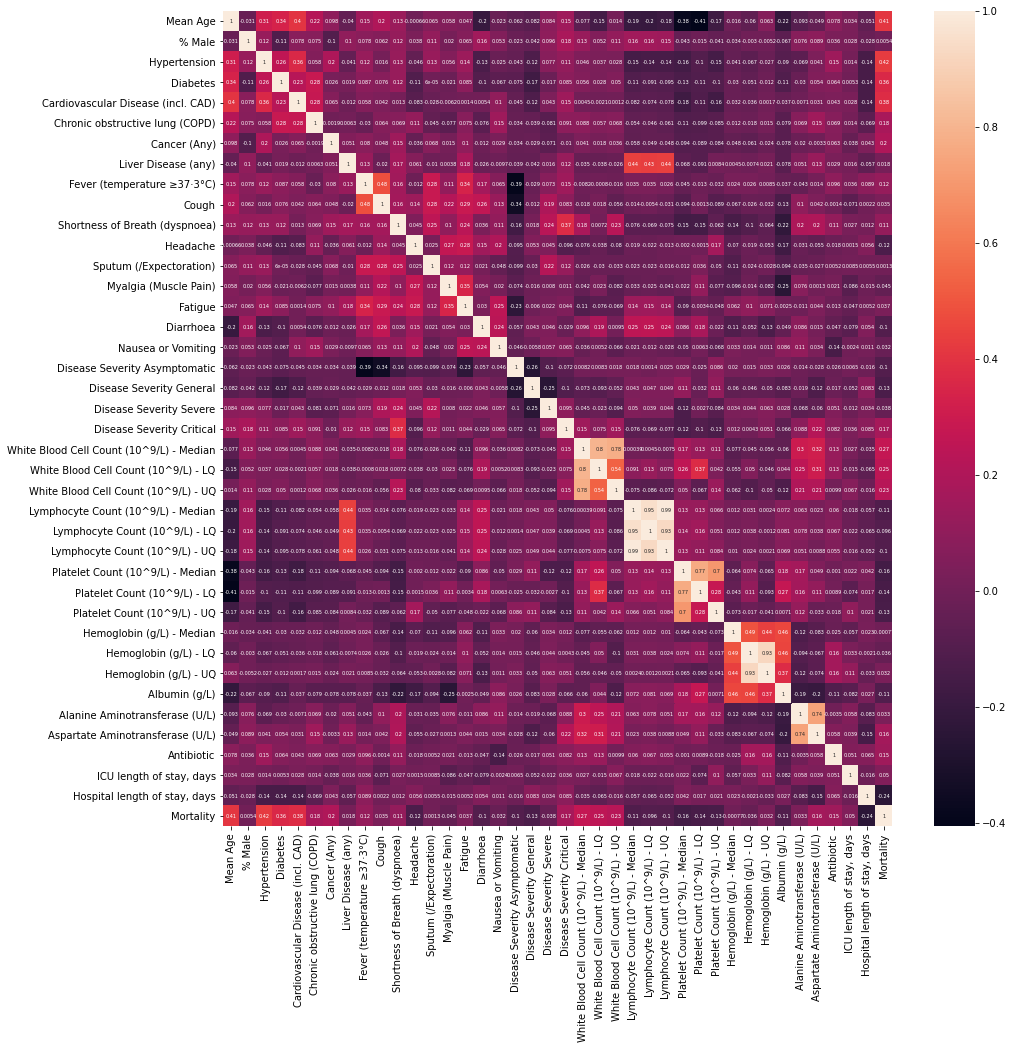

In [442]:

plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot_kws={"size":5},annot=True)

<AxesSubplot:>

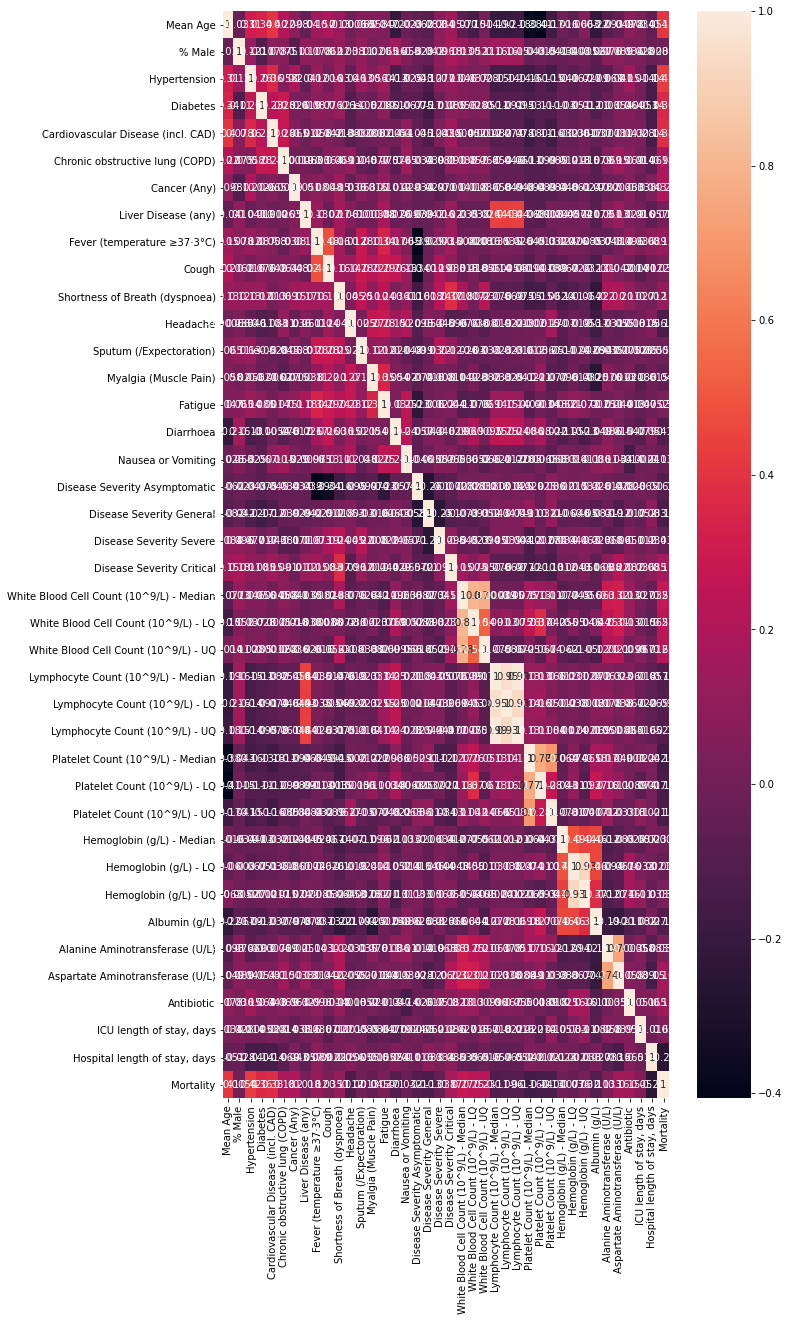

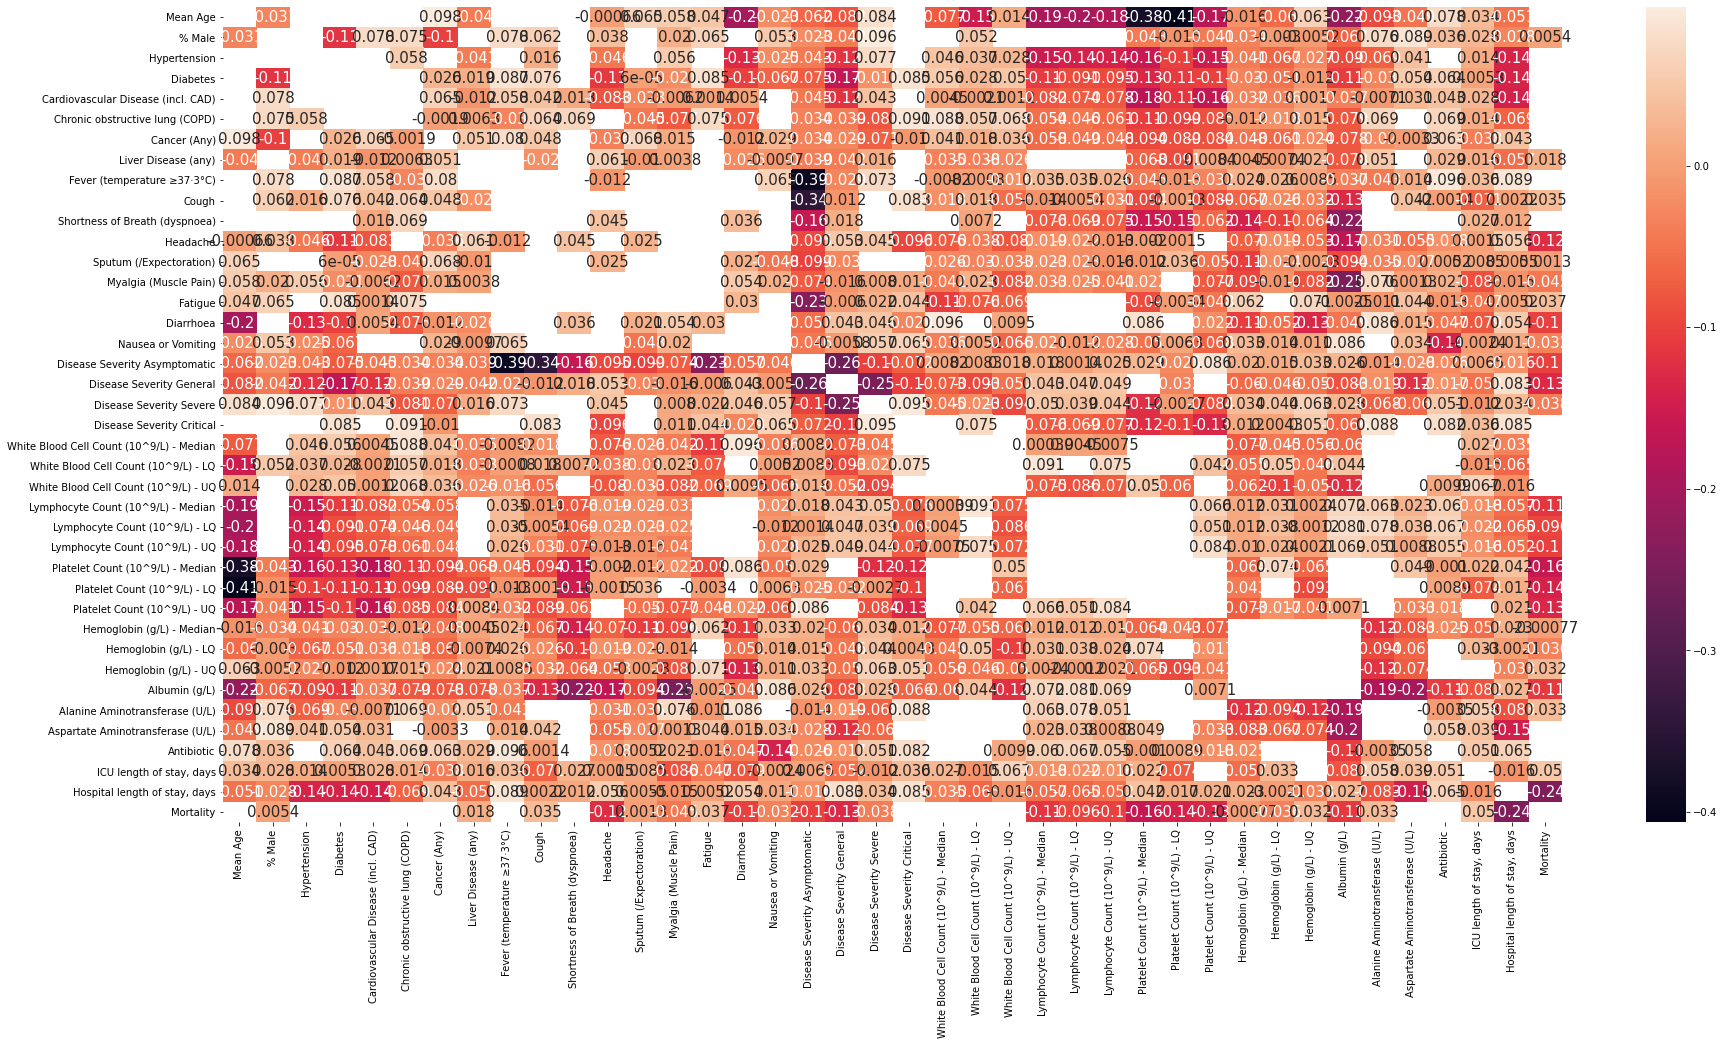

In [443]:
corr = df_train.corr()
corr
plt.figure(figsize= (10, 20))
sns.heatmap(corr, annot= True)
plt.figure(figsize= (30,15))
sns.heatmap(corr[(corr <= .1)], annot= True, annot_kws={"size": 15})

In [447]:
corr_matrix = df_train.corr().abs()

In [451]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [457]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.1)]

In [466]:
from sklearn.preprocessing import LabelEncoder
for c in df_train.columns[:1]:
    if df_train[c].dtype == object and len(df_train[c].unique())<=50:
        print(f"{c}")
        lbl = LabelEncoder() 
        lbl.fit(list(df_train[c].values)) 
        df_train[c] = lbl.transform(list(df_train[c].values))

Severity


In [467]:
X = df_train.drop('Mortality',axis=1)

In [468]:
y = df_train['Mortality']

In [469]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [470]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [471]:
print(linreg.intercept_)
print(linreg.coef_)

-0.5975068404618926
[ 2.67400014e-02  5.09847182e-03 -3.42120757e-03  2.54836439e-01
  2.15472164e-01  1.64626963e-01 -2.99408767e-02  2.87014192e-01
  3.18973908e-01  5.10875156e-02 -6.45249970e-02 -9.54594652e-02
 -1.72066611e-01 -2.29395900e-02 -7.20759740e-02  4.73623111e-02
  5.26325226e-02  3.93009354e-02 -1.21739247e-01  3.90834958e-02
 -8.05183606e-02 -3.28756831e-02  2.23222522e-02  1.55923526e-02
  8.36512978e-03 -8.46740428e-03  5.46996079e-02 -5.53033366e-02
  3.58944301e-04  2.62346292e-04  2.68822609e-04  2.19736011e-03
 -4.85044069e-03  3.02712092e-03 -3.37059034e-03 -1.72653385e-03
  1.37210401e-03  6.77870196e-02  1.76819374e-02 -1.26125022e-02]


In [472]:
y_pred = linreg.predict(X_test)

In [473]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

0.1956759001000135


In [478]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.28883432000892734


In [479]:
df_sample = pd.read_excel('sample_submission_mortality_rate.xlsx')
df_sample

,ID,Mortality
0,155,1000
1,156,1000
2,156,1000
3,156,1000
4,157,1000
5,157,1000
6,157,1000
7,157,1000
8,158,1000
9,158,1000


In [480]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)